# Homework 4

## FINM 36700 - 2024

### UChicago Financial Mathematics


## DFA Case



### Notation
(Hidden LaTeX commands)







$$\newcommand{\mux}{\tilde{\boldsymbol{\mu}}}$$
$$\newcommand{\wtan}{\boldsymbol{\text{w}}^{\text{tan}}}$$
$$\newcommand{\wtarg}{\boldsymbol{\text{w}}^{\text{port}}}$$
$$\newcommand{\mutarg}{\tilde{\boldsymbol{\mu}}^{\text{port}}}$$
$$\newcommand{\wEW}{\boldsymbol{\text{w}}^{\text{EW}}}$$
$$\newcommand{\wRP}{\boldsymbol{\text{w}}^{\text{RP}}}$$
$$\newcommand{\wREG}{\boldsymbol{\text{w}}^{\text{REG}}}$$

### Dimensional Fund Advisors, 2002 [HBS 9-203-026].
Pages 1-5 of the case are required. Pages 6-11 get into interesting issues around trading (especially adverse selection) and tax considerations. These sections are useful for building market knowledge, but we will not cover them.


## 1. DFA's Strategy

<i> This section is not graded, and you do not need to submit your answers. But you are expected to consider these issues and be ready to discuss them.</i>

### 1. Investment Philosophy
a. In 100 words or less, describe DFA's belief about how to find premium in the market.

b. To what degree does their strategy rely on individual equity analysis? Macroeconomic fundamentals? Efficient markets?

c. Are DFA's funds active or passive?

d. What do DFA and others mean by a "value" stock? And a "growth" stock?



### 2. Challenges for DFA's view.
a) What challenge did DFA's model see in the 1980's?


b) And in the 1990's?


### 3. The market.

a) Exhibit 3 has data regarding a universe of 5,020 firms. How many are considered "large cap"? What percent of the market value do they account for?


b) Exhibit 6 shows that the U.S. value factor (HML) has underperformed the broader U.S. equity market in 1926-2001, including every subsample except 1963-1981. So why should an investor be interested in this value factor?


## 2. The Factors
DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a "size" and "value" factor. Note that these three factors are already listed as excess returns. 
Use the data found in <file>`dfa analysis data.xlsx`</file>.

- FACTORS: Monthly excess return data for the overall equity market, $\tilde{r}^{m}$. The sheet also contains data on two additional factors, SMB and HML, as well as the risk-free rate. You do not need any of these columns for the homework. Just use the MKT column, which is excess market returns. (So no need to subtract the risk-free rate.)

In [26]:
import pandas as pd
import my_functions as mf
import seaborn as sns

file = "../../data/dfa_analysis_data.xlsx"

factors = pd.read_excel(file, sheet_name="factors",index_col = "Date")

In [27]:
factors = factors[factors.index <= "2023-07-31"]
factors = factors.drop(["RF"], axis=1)

### 1. Calculate their univariate performance statistics:
- Mean
- Volatility
- Sharpe
- VaR(.05)

In [28]:
mf.get_metrics_all(factors, adj_factor=12)[["Mean","Volatility","Sharpe_Ratio","VaR"]].style.format('{:.2%}')

,Mean,Volatility,Sharpe_Ratio,VaR
Mkt-RF,8.14%,18.51%,43.98%,-8.02%
SMB,2.27%,10.98%,20.71%,-4.21%
HML,4.12%,12.38%,33.31%,-4.21%


### Report these for the following three subsamples:
- Beginning - 1980
- 1981 - 2001
- 2002 - End

In [29]:
period1 = "1980-12-31"
period2 = "2001-12-31"

In [30]:
print("\nPeriod 1: Beginnning-1980")
factors_period1 = factors[factors.index <= period1]
mf.get_metrics_all(factors_period1, adj_factor=12)[["Mean","Volatility","Sharpe_Ratio","VaR"]].style.format('{:.2%}')


Period 1: Beginnning-1980


,Mean,Volatility,Sharpe_Ratio,VaR
Mkt-RF,8.11%,20.51%,39.57%,-8.40%
SMB,3.40%,11.46%,29.66%,-4.34%
HML,4.95%,13.38%,36.97%,-4.29%


In [31]:
print("\nPeriod 2: 1981-2001")
factors_period2 = factors[(factors.index > period1) & (factors.index <= period2)]
mf.get_metrics_all(factors_period2, adj_factor=12)[["Mean","Volatility","Sharpe_Ratio","VaR"]].style.format('{:.2%}')


Period 2: 1981-2001


,Mean,Volatility,Sharpe_Ratio,VaR
Mkt-RF,7.73%,15.74%,49.08%,-6.45%
SMB,-0.09%,11.83%,-0.73%,-4.65%
HML,6.38%,11.12%,57.36%,-4.18%


In [32]:
print("\nPeriod 3: 2002-End")
factor_period3 = factors[(factors.index > period2)]
mf.get_metrics_all(factor_period3, adj_factor=12)[["Mean","Volatility","Sharpe_Ratio","VaR"]].style.format('{:.2%}')


Period 3: 2002-End


,Mean,Volatility,Sharpe_Ratio,VaR
Mkt-RF,8.62%,15.53%,55.50%,-7.91%
SMB,1.73%,8.64%,20.03%,-3.83%
HML,-0.15%,10.76%,-1.40%,-4.14%


### 2. Based on the factor statistics above, answer the following.

a) Does each factor have a premium (positive expected excess return) in each subsample?


*Answer*: The only exception is the Small-minus-Big (`SMB`) Size Factor, which showed a marginal negative return of -0.09% between 1981 and 2001. Consequently, this resulted in a negative Sharpe Ratio of -0.73% for that period. 

b) Does the premium to the size factor get smaller after 1980?


*Answer*: Yes, after 1980, the `SMB` factor has never shown performance as strong as in the past, both in terms of premium (return) and return adjusted for risk (Sharpe Ratio). However, its worst performance occurred between the years 1981 and 2001.

c) Does the premium to the value factor get smaller during the 1990's?


*Answer:* No, during the 90s, the value factor (High-minus-Low `HML` or Value Factor) showed a return of 6.38% compared to 4.95% in the early years. However, its returns have decreased in the most recent year of the sample.

d) How have the factors performed since the time of the case, (2002-present)?



*Answer:* In comparison with the market performance and their own past performance, the factors `SMB` and `HML` have presented poor performance since the time of the case, only achieving an excess return of 1.10% and 0.05%, respectively.

### 3. The factors are constructed in such a way as to reduce correlation between them. 

Report the correlation matrix across the three factors. Does the construction method succeed in keeping correlations small? 

Does it achieve this in each subsample?

<Axes: >

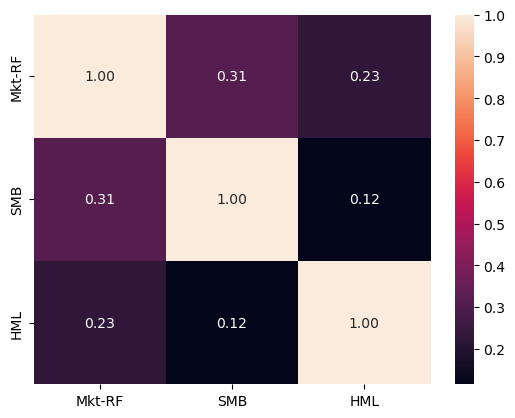

In [33]:
corr_matrix_all = factors.corr()
sns.heatmap(corr_matrix_all,annot=True, fmt=".02f")

<Axes: >

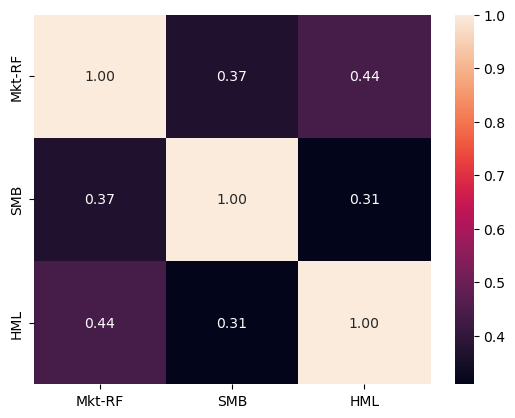

In [34]:
corr_matrix_period1 = factors_period1.corr()
sns.heatmap(corr_matrix_period1,annot=True, fmt=".02f")

<Axes: >

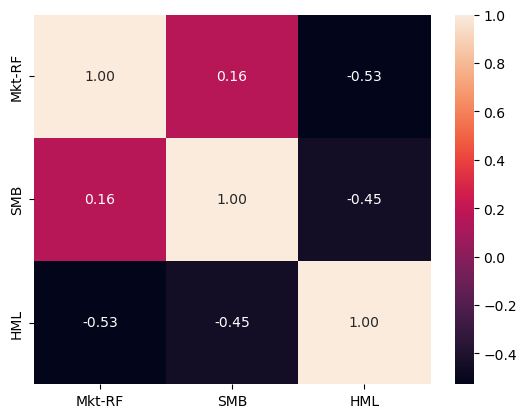

In [35]:
corr_matrix_period2 = factors_period2.corr()
sns.heatmap(corr_matrix_period2,annot=True, fmt=".02f")

<Axes: >

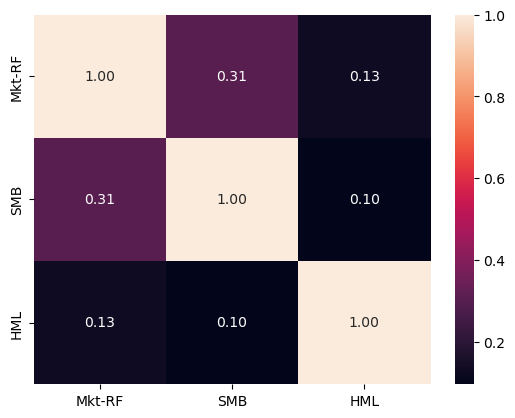

In [36]:
corr_matrix_period3 = factor_period3.corr()
sns.heatmap(corr_matrix_period3,annot=True, fmt=".02f")

*Answer: * Yes, the factors have showed accross all the period a correlation aroung 30% and as top 53% (on the period of 90's between `HML` and `Mkt`)

### 4. Plot the cumulative returns of the three factors. Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

<Axes: title={'center': 'Complete Period'}, xlabel='Date'>

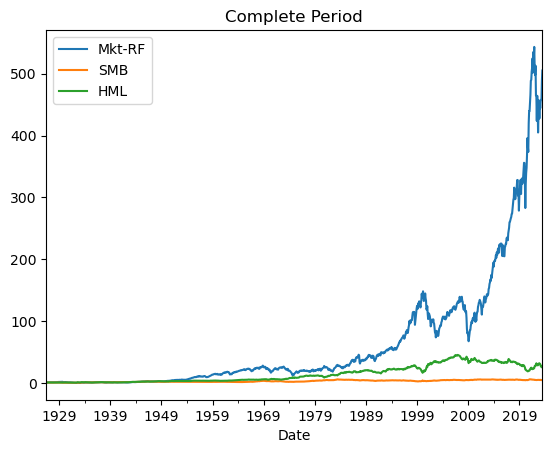

In [37]:
(1+factors).cumprod().plot(title="Complete Period")

<Axes: title={'center': 'Period between 1981-2001'}, xlabel='Date'>

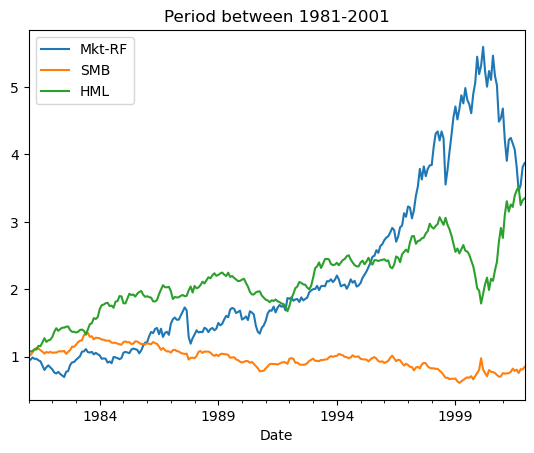

In [38]:
(1+factors_period2).cumprod().plot(title="Period between 1981-2001")

<Axes: title={'center': 'Period from 2002-End'}, xlabel='Date'>

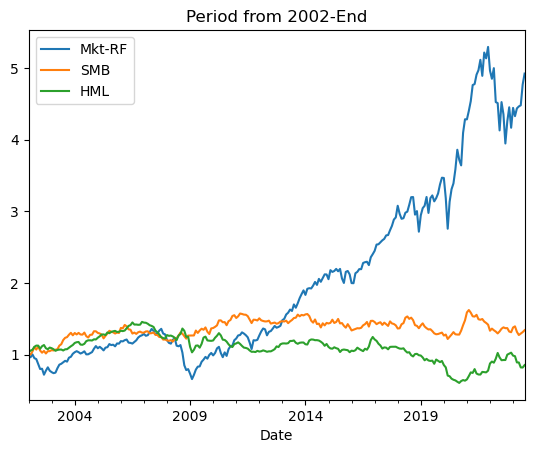

In [39]:
(1+factor_period3).cumprod().plot(title="Period from 2002-End")

### 5. Does it appear that all three factors were valuable in 1981-2001? And post-2001? Would you advise DFA to continue emphasizing all three factors?

*Answer:* Between 1981 and 2001, the Size factor showed a performance similar to the Market, even outperforming it in some periods. However, in more recent years (after 2013), the two factors have presented cumulative returns far lower than the market. This could be due to the significant impact of big-tech on the markets. It might be a better approach to consider different types of factors.

## 3. CAPM

#### DFA believes that premia in stocks and stock portfolios is related to the three factors. Let's test 25 equity portfolios that span a wide range of size and value measures

- PORTFOLIOS: Monthly total return data on 25 equity portfolios sorted by their size-value characteristics. Denote these as $r^{i}$, for n = 1,....,25.
- Note that while the factors were given as excess returns, the portfolios are total returns.
- For this entire problem, focus on the 1981-Present subsample.

In [96]:
portfolio = pd.read_excel(file, sheet_name="portfolios (total returns)",index_col = "Date")
portfolio = portfolio[portfolio.index > "1980-12-31"]
portfolio = portfolio[portfolio.index <= "2023-07-31"]

### 1. Summary Statistics. For each portfolio,

- Use the Risk-Free rate column in the factors tab to convert these total returns to excess returns.
- Calculate the (annualized) univariate statistics from 1.1.
- Can the difference in mean excess returns of the portfolios be explained by differences in their volatilities? Or by their VaR(.05) statistics?

In [97]:
import importlib
importlib.reload(mf)

<module 'my_functions' from 'c:\\Users\\josel\\Documents\\GitHub\\finm-portfolio-2024\\homework\\my_homework\\my_functions.py'>

In [98]:
factors = pd.read_excel(file, sheet_name="factors",index_col = "Date")

portfolio_data = pd.merge(portfolio, factors[["RF"]], left_index=True, right_index=True,how = "left")
portfolio_data = portfolio_data.apply(lambda x: x - portfolio_data["RF"] if x.name != "RF" else x)
portfolio_data = portfolio_data.drop("RF",axis = 1)
portfolio_data = pd.merge(portfolio_data, factors[["Mkt-RF"]], left_index=True, right_index=True,how = "left")


In [104]:
mf.get_metrics_all(portfolio_data, adj_factor=12)[["Mean","Volatility","Sharpe_Ratio","VaR"]].style.format('{:.2%}')

,Mean,Volatility,Sharpe_Ratio,VaR
SMALL LoBM,0.86%,27.26%,3.17%,-12.11%
ME1 BM2,9.15%,23.57%,38.82%,-9.57%
ME1 BM3,9.29%,19.78%,46.96%,-8.58%
ME1 BM4,11.73%,19.22%,61.02%,-7.64%
SMALL HiBM,12.94%,20.83%,62.15%,-8.88%
ME2 BM1,5.98%,24.48%,24.44%,-10.40%
ME2 BM2,10.19%,20.42%,49.91%,-8.51%
ME2 BM3,10.67%,18.48%,57.75%,-7.94%
ME2 BM4,10.90%,18.07%,60.30%,-7.74%
ME2 BM5,11.62%,21.38%,54.35%,-9.67%


<Axes: xlabel='Volatility', ylabel='Mean'>

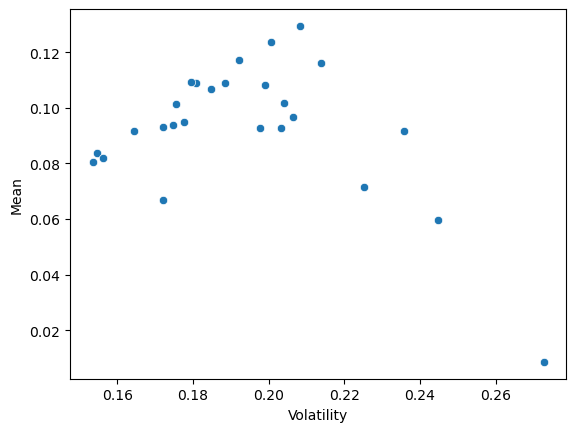

In [105]:
sns.scatterplot(mf.get_metrics_all(portfolio_data, adj_factor=12), x="Volatility", y="Mean")

<Axes: xlabel='VaR', ylabel='Mean'>

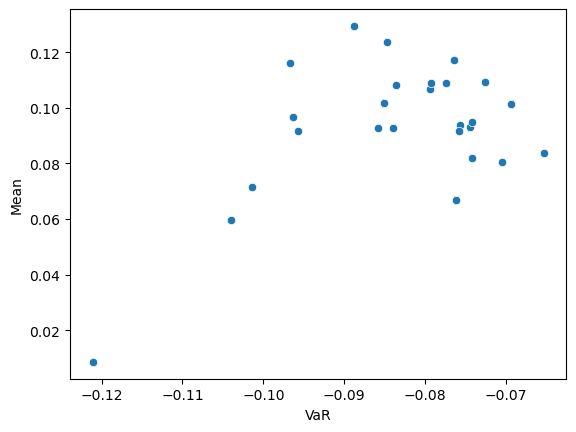

In [106]:
sns.scatterplot(mf.get_metrics_all(portfolio_data, adj_factor=12), x="VaR", y="Mean")

### 2. CAPM

The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio's) expected excess return is completely a function of its beta to the equity market index (SPY, or in this case, MKT.)
Specifically, it asserts that, for any excess return, $\tilde{r}^{i}$, its mean is proportional to the mean excess return of the market, $\tilde{r}^{m}$, where the proporitonality is the regression beta of $\tilde{r}^{i}$ on $\tilde{r}^{m}$.

$$\mathop{\mathbb{E}}[\tilde{r}^{i}_{t}] = \beta \mathop{\mathbb{E}}[\tilde{r}^{m}_{t}]$$

Let's examine whether that seems plausible.

a) For each of the n = 25 test portfolios, run the CAPM time-series regression:

$$
\tilde{r}_{t}^{i} = \alpha^{i} + \beta^{i,m}\tilde{r}^{m}_{t} + \varepsilon_{t}
$$


So you are running 25 separate regressions, each using the T-sized sample of time-series data.

In [107]:
regressions_results = mf.benchmark_regresion(portfolio_data, benchmark="Mkt-RF", adj=12)

In [109]:
regressions_results

,Alpha-Adj,Beta,R-square,std_errors,Asset_mean,Treynor Ratio,Information Ratio,Sortino Ratio,MAE
SMALL LoBM,-0.101802,1.350155,0.598293,0.049885,0.008631,0.006393,-0.589110,0.047747,0.034792
ME1 BM2,-0.003391,1.160258,0.591111,0.043512,0.091509,0.078870,-0.022498,0.579883,0.029577
ME1 BM3,0.008367,1.033420,0.666006,0.032998,0.092893,0.089889,0.073196,0.660049,0.025001
ME1 BM4,0.038275,0.966237,0.616351,0.034374,0.117306,0.121405,0.321441,0.808137,0.024686
SMALL HiBM,0.048642,0.987966,0.548889,0.040386,0.129450,0.131027,0.347688,0.830321,0.027687
ME2 BM1,-0.049226,1.333321,0.723865,0.037132,0.059829,0.044873,-0.382695,0.348327,0.027756
ME2 BM2,0.009581,1.128632,0.745571,0.029729,0.101895,0.090282,0.093038,0.681431,0.022429
ME2 BM3,0.022919,1.024343,0.749948,0.026671,0.106703,0.104167,0.248074,0.751274,0.020388
ME2 BM4,0.029605,0.970294,0.703395,0.028411,0.108968,0.112304,0.300816,0.783005,0.021434
ME2 BM5,0.025481,1.109480,0.656806,0.036162,0.116228,0.104759,0.203409,0.665972,0.026640


b) Report the mean-absolute-error of the CAPM:
If the CAPM were true, what would we expect of the MAE?

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |\alpha_i|
$$


In [110]:
import numpy as np
np.mean(np.abs(regressions_results[["Alpha-Adj"]]))

0.023397334107571974

c) Report the estimated $β^{i,m}$, Treynor Ratio, $α^{i}$, and Information Ratio for each of the n regressions.

In [111]:
display(regressions_results[["Beta","Treynor Ratio","Alpha-Adj","Information Ratio"]].T)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Beta,1.350155,1.160258,1.033420,0.966237,0.987966,1.333321,1.128632,1.024343,0.970294,1.109480,...,1.185534,1.061789,1.004859,0.982516,1.041574,0.995104,0.923224,0.875574,0.905370,1.013596
Treynor Ratio,0.006393,0.078870,0.089889,0.121405,0.131027,0.044873,0.090282,0.104167,0.112304,0.104759,...,0.078152,0.089527,0.093280,0.103249,0.103951,0.092103,0.090729,0.092005,0.073903,0.095404
Alpha-Adj,-0.101802,-0.003391,0.008367,0.038275,0.048642,-0.049226,0.009581,0.022919,0.029605,0.025481,...,-0.004316,0.008212,0.011544,0.021081,0.023080,0.010260,0.008250,0.008942,-0.007143,0.013797
Information Ratio,-0.589110,-0.022498,0.073196,0.321441,0.347688,-0.382695,0.093038,0.248074,0.300816,0.203409,...,-0.051401,0.128763,0.149916,0.247686,0.201667,0.191531,0.146970,0.128080,-0.072880,0.104303


In [112]:
portfolio_data["Mkt-RF"].mean()*12*100

8.179256360078279

In [113]:
regressions_results["Treynor Ratio"].mean()

0.09106597675717573

In [114]:
regressions_results["Alpha-Adj"].describe()*100

count    2500.000000
mean        0.758237
std         3.091530
min       -10.180173
25%         0.821182
50%         1.154371
75%         2.307951
max         4.864170
Name: Alpha-Adj, dtype: float64

d) If CAPM were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

*Answer:* The CAPM implies that

* $Treynor\ Ratio = \frac{\mathbb{E}[r^{i}]}{\beta^{i,m}}$, given CAPM $(\mathbb{E}[r^{i}] = \beta^{i,m}\mathbb{E}[r^{m}])$ $$\Rightarrow Treynor\ Ratio =  \mathbb{E}[r^{m}]   \forall i $$
Which should be around 8.36% (market return for that period), but we can see that the average Teynor Ration for the assets is 9.06% 

* Alphas should be equal to zero (because CAMP does not include Alpha in the model), but we got Alphas from -10.6% to +4.46% 

## 3. Cross-sectional Estimation
Let's test (CAPM) directly. We already have what we need:

- The dependent variable, (y): mean excess returns from each of the n = 25 portfolios.
- The regressor, (x): the market beta from each of the n = 25 time-series regressions.

- Then we can estimate the following equation:

$$ 
\underbrace{\mathop{\mathbb{E}}[\tilde{r}^{i}]}_\text{n x 1 data} = 
    \underbrace{\eta}_\text{regression intercept} +
    \underbrace{\beta^{i,m}}_\text{n x 1 data} * 
    \underbrace{\lambda_{m}}_\text{regression estimate} + 
    \underbrace{\upsilon}_\text{n x 1 residuals}
$$ 
 
- Note that we use sample means as estimates of $\mathop{\mathbb{E}}[\tilde{r}^{i}]$.
- This is a weird regression! The regressors are the betas from the time-series regressions we already ran!
- This is a single regression, where we are combining evidence across all n = 25 series. Thus, it is a cross-sectional regression!
- The notation is trying to emphasize that the intercept is different than the time-series $\alpha$ and that the regressor coefficient is different than the time-series betas.

- Report the R-squared of this regression.
- Report the intercept, $\upsilon$.
- Report the regression coefficient, $\lambda_{m}$.

In [121]:
sample_mean = pd.DataFrame(portfolio_data.drop(["Mkt-RF"], axis = 1).mean(), columns=["Mean"])
betas = regressions_results[["Beta"]]
cross_sectional = pd.merge(sample_mean, betas, left_index=True, right_index=True, how = "left")

<Axes: xlabel='Beta', ylabel='Mean'>

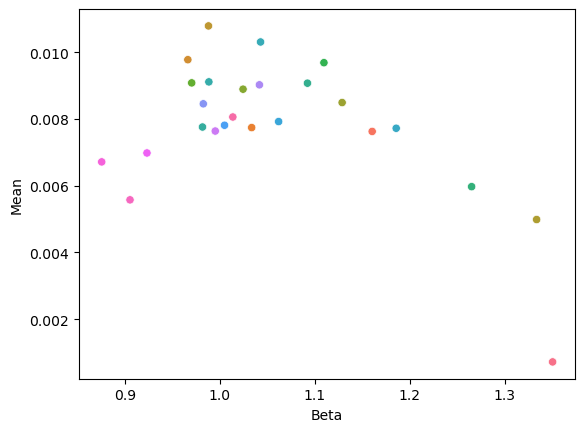

In [122]:
sns.scatterplot(data=cross_sectional, x="Beta", y="Mean", hue=cross_sectional.index, legend=False)

In [123]:
import statsmodels.api as sm

X = sm.add_constant(cross_sectional["Beta"])
y = cross_sectional["Mean"]
mod = sm.OLS(y, X).fit()

In [124]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mean   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     8.692
Date:                Sat, 26 Oct 2024   Prob (F-statistic):            0.00721
Time:                        22:19:03   Log-Likelihood:                 123.95
No. Observations:                  25   AIC:                            -243.9
Df Residuals:                      23   BIC:                            -241.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0170      0.003      5.432      0.000       0.011       0.023
Beta          -0.0087      0.003     -2.948      0.007      -0.015      -0.003
==============================================================================
Omnibus:                        6.492   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                4.570
Skew:                          -0.987   Prob(JB):                        0.102
Kurtosis:                       3.702   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
print(f"R-squared: {round(mod.rsquared*100,2):.2f}%\nRegression Coefficient: {round(mod.params['Beta']*100,2):.2f}%\nIntercept: {round(mod.params['const']*12*100,2):.2f}%")

R-squared: 27.43%
Regression Coefficient: -0.87%
Intercept: 20.41%


What would these three statistics be if (CAPM) were true?

In [128]:
portfolio_data["Mkt-RF"].mean()*12*100  

8.179256360078279

*Answer:* If the CAPM were true, the cross-sectional R-squared should be 1, the regression coefficient should equal the in-sample expected return of the market (8.36%), and the intercept should be zero. Therefore, we can conclude that in this sample, the CAPM does not hold.

4) Broadly speaking, do these results support DFA's belief in size and value portfolios containing premia unrelated to the CAPM?

*Answer:* In fact, these results suggest that we could add other factors in order to explain the excess of return of the assets, and both, Size and Value factor showed a low corralation with the market and accross each other

# 4) Extensions

1) Re-do the analysis of 3.3 and 3.3, but instead of using the market return as the factor, use a new factor: the in-sample tangency portfolio of the n = 25 portfolios.

You will not use the factor data for this problem!
- Calculate $\tilde{r}^{tan}$ by solving the MV optimization of the n excess returns.
- Consider this to be your single factor.

Instead of testing (CAPM), you will test the MV model:

$$\mathop{\mathbb{E}}[\tilde{r}^{i}_{t}] = \beta^{i,tan} \mathop{\mathbb{E}}[\tilde{r}^{tan}_{t}]$$

What do you find?

In [129]:
portfolio_data["Tangency_portfolio"] = portfolio_data.drop(["Mkt-RF"],axis = 1) @ mf.weights_tang(portfolio_data.drop(["Mkt-RF"],axis = 1), adj_factor=12)

In [130]:
portfolio_data["Tangency_portfolio"].mean()*12*100

39.88596178645613

In [131]:
mf.get_metrics_all(portfolio_data, adj_factor=12)[["Mean","Volatility","Sharpe_Ratio","VaR"]].style.format('{:.2%}')

,Mean,Volatility,Sharpe_Ratio,VaR
SMALL LoBM,0.86%,27.26%,3.17%,-12.11%
ME1 BM2,9.15%,23.57%,38.82%,-9.57%
ME1 BM3,9.29%,19.78%,46.96%,-8.58%
ME1 BM4,11.73%,19.22%,61.02%,-7.64%
SMALL HiBM,12.94%,20.83%,62.15%,-8.88%
ME2 BM1,5.98%,24.48%,24.44%,-10.40%
ME2 BM2,10.19%,20.42%,49.91%,-8.51%
ME2 BM3,10.67%,18.48%,57.75%,-7.94%
ME2 BM4,10.90%,18.07%,60.30%,-7.74%
ME2 BM5,11.62%,21.38%,54.35%,-9.67%


In [132]:
regressions_results_2 = mf.benchmark_regresion(portfolio_data.drop(["Mkt-RF"],axis = 1), benchmark="Tangency_portfolio", adj=12)

In [133]:
regressions_results_2

,Alpha-Adj,Beta,R-square,std_errors,Asset_mean,Treynor Ratio,Information Ratio,Sortino Ratio,MAE
SMALL LoBM,-2.937266e-15,0.021639,0.000284,0.078696,0.008631,0.39886,-1.077459e-14,0.047747,0.058258
ME1 BM2,-2.328866e-15,0.229427,0.042718,0.066577,0.091509,0.39886,-1.009780e-14,0.579883,0.048716
ME1 BM3,-2.417012e-15,0.232897,0.062518,0.055285,0.092893,0.39886,-1.262065e-14,0.660049,0.041211
ME1 BM4,-1.111904e-15,0.294104,0.105540,0.052485,0.117306,0.39886,-6.115601e-15,0.808137,0.038096
SMALL HiBM,-1.978561e-15,0.324550,0.109477,0.056743,0.129450,0.39886,-1.006582e-14,0.830321,0.040198
ME2 BM1,-2.058005e-15,0.150001,0.016933,0.070062,0.059829,0.39886,-8.479523e-15,0.348327,0.053487
ME2 BM2,-1.159229e-15,0.255466,0.070600,0.056819,0.101895,0.39886,-5.889551e-15,0.681431,0.042978
ME2 BM3,-1.551819e-15,0.267520,0.094539,0.050752,0.106703,0.39886,-8.826696e-15,0.751274,0.037985
ME2 BM4,-6.919920e-16,0.273200,0.103064,0.049405,0.108968,0.39886,-4.043327e-15,0.783005,0.036861
ME2 BM5,-1.351458e-15,0.291402,0.083741,0.059088,0.116228,0.39886,-6.602597e-15,0.665972,0.042999


2) Re-do the analysis of 3.3 and 3.4, but instead of using the market return as the factor, use all three factors, (MKT, SMB, and HML). Note again that all three are already given as excess returns, so there is no need to use the risk-free rate data.
Thus, instead of testing (CAPM), you will be testing the Fama-French 3-Factor Model.

$$\mathop{\mathbb{E}}[\tilde{r}^{i}_{t}] = \beta^{i,m} \mathop{\mathbb{E}}[\tilde{r}^{m}_{t}] +  \beta^{i,s} \mathop{\mathbb{E}}[\tilde{r}^{s}_{t}] +  \beta^{i,v} \mathop{\mathbb{E}}[\tilde{r}^{v}_{t}]$$

3. We measured how well the CAPM performs by checking the MAE of the time-series alphas. Under classic statistical assumptions, we can test the null hypothesis that the CAPM works by calculating,

$$\text{H} = \text{T} \ [1+(\text{SR}_{m})^{2}]^{-1} \alpha^{'}\Sigma^{-1}_{\epsilon}\alpha ~ \chi^{2}_{n}$$

- Note the following:
- $\alpha$ is an n x 1 vector of the individual regression alphas, $\alpha^{i}$.
- $\Sigma_{\epsilon}$ is the n x n covariance matrix of the time-series of regression residuals, $\epsilon^{i}$, corresponding to each regression.
- $\text{SR}_{m}$ is the Sharpe-Ratio of $\tilde{r}^{m}$.

The test statistic, H, has a chi-squared distribution with n = 25 degrees of freedom. So under the null hypothesis of the CAPM holding, H should be small, and the distribution allows us to calculate the probability of seeing such a large H, conditional on the CAPM being true.

a) Which is a stricter test: checking whether any of the n values of $\alpha^{i}$ have a statistically significant t-test or checking whether H calculated above is significant?

b) Conceptually, how does the test-statistic H relate to checking whether $\tilde{r}^{m}$ spans the tangency portfolio?